<a href="https://colab.research.google.com/github/Aditya-Singh0001/GDGproject/blob/main/Assignment3_que1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

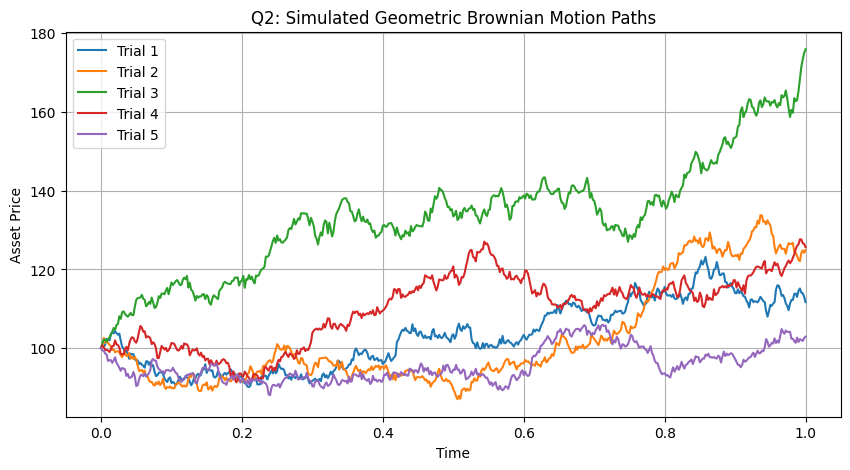

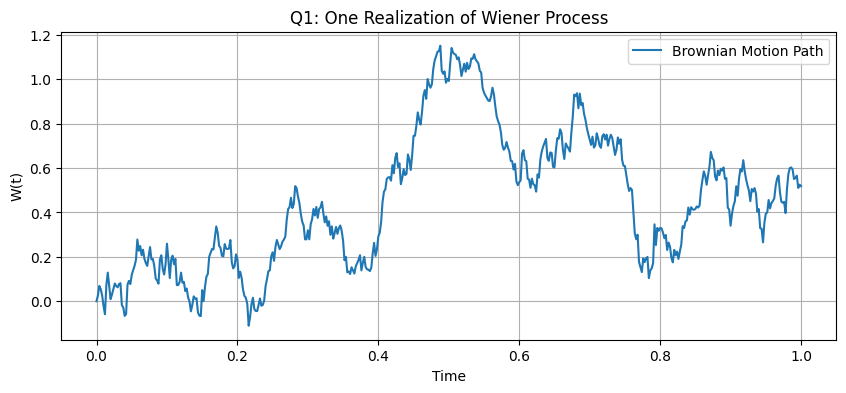

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Random seed for reproducibility
np.random.seed(42)

# Time parameters
total_time = 1.0
steps = 500
delta_t = total_time / steps
time_grid = np.linspace(0, total_time, steps + 1)

# GBM parameters
initial_price = 100
mu = 0.1         # Drift
vol = 0.2        # Volatility
num_simulations = 5


def generate_gbm_paths(S0, mu, vol, T, steps, paths):
    delta = T / steps
    timeline = np.linspace(0, T, steps + 1)
    simulations = np.zeros((paths, steps + 1))

    for p in range(paths):
        noise = np.random.normal(0.0, np.sqrt(delta), size=steps)
        brownian_path = np.concatenate(([0.0], np.cumsum(noise)))
        growth = (mu - 0.5 * vol**2) * timeline
        randomness = vol * brownian_path
        simulations[p, :] = S0 * np.exp(growth + randomness)

    return simulations, timeline


# Simulate GBM paths
simulated_prices, timeline = generate_gbm_paths(initial_price, mu, vol, total_time, steps, num_simulations)

# Plot GBM simulations
plt.figure(figsize=(10, 5))
for j in range(num_simulations):
    plt.plot(timeline, simulated_prices[j], label=f'Trial {j+1}')
plt.title('Q2: Simulated Geometric Brownian Motion Paths')
plt.xlabel('Time')
plt.ylabel('Asset Price')
plt.grid(True)
plt.legend()
plt.show()


# ------------------- Q1: Single Wiener Process -------------------

def simulate_brownian_motion(T, steps):
    dt = T / steps
    increments = np.random.normal(0.0, np.sqrt(dt), size=steps)
    path = np.concatenate(([0.0], np.cumsum(increments)))
    return path


# Generate Wiener path
wiener_path = simulate_brownian_motion(total_time, steps)

# Plot single Brownian motion path
plt.figure(figsize=(10, 4))
plt.plot(time_grid, wiener_path, label='Brownian Motion Path')
plt.title('Q1: One Realization of Wiener Process')
plt.xlabel('Time')
plt.ylabel('W(t)')
plt.grid(True)
plt.legend()
plt.show()
